In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.keras.datasets import mnist

C:\Users\thabu\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
style.use('ggplot')

In [3]:
# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

In [4]:
# Load MNIST Data
print('\nLoading MNIST Data...')
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

In [5]:
# Flatten images for RandomForestClassifier
train_img = train_img.reshape((train_img.shape[0], -1))
test_img = test_img.reshape((test_img.shape[0], -1))

In [6]:
# Features and Labels
X = train_img
y = train_labels

In [7]:
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
# Pickle the Classifier for Future Use
print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=10)

In [9]:
with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [10]:
with open('MNIST_RFC.pickle', 'rb') as pickle_in:
    clf = pickle.load(pickle_in)


Calculating Accuracy of trained Classifier...

RFC Trained Classifier Confidence:  0.9716666666666667

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Accuracy of Classifier on Validation Image Data:  0.9716666666666667

Creating Confusion Matrix...

Confusion Matrix: 
 [[611   0   2   1   1   3   3   0   2   1]
 [  0 648   2   3   1   0   0   0   0   0]
 [  1   1 557   2   3   0   1   4   2   1]
 [  1   0   7 568   0   5   0   2   4   2]
 [  2   1   1   0 561   0   0   4   0  11]
 [  3   1   0   5   1 535   2   0   2   2]
 [  4   0   1   0   2   2 568   0   3   0]
 [  1   6   6   0   3   0   0 612   3   2]
 [  2   2   4   5   4   1   2   0 564   1]
 [  2   0   1   6   7   2   0   5   3 606]]


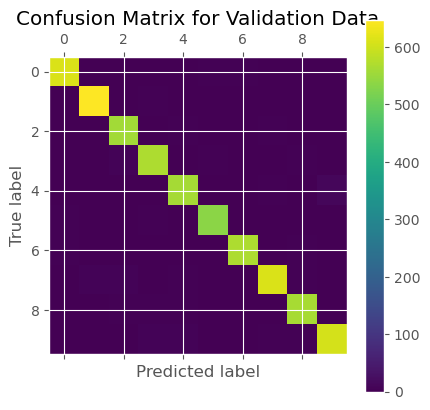


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Accuracy of Classifier on Test Images:  0.9686

Creating Confusion Matrix for Test Data...

Confusion Matrix for Test Data: 
 [[ 970    0    1    0    0    3    2    1    3    0]
 [   0 1121    3    3    0    1    3    0    3    1]
 [   6    0 1001    5    1    0    4    8    7    0]
 [   0    0   12  970    0    7    0    9    9    3]
 [   1    0    0    0  953    0    5    1    3   19]
 [   4    0    0   15    3  854    7    2    5    2]
 [   7    4    1    0    3    4  936    0    3    0]
 [   1    5   19    2    1    0    0  987    3   10]
 [   2    0    4    8    4    7    5    3  932    9]
 [   4    5    2   10   13    1    1    5    6  962]]


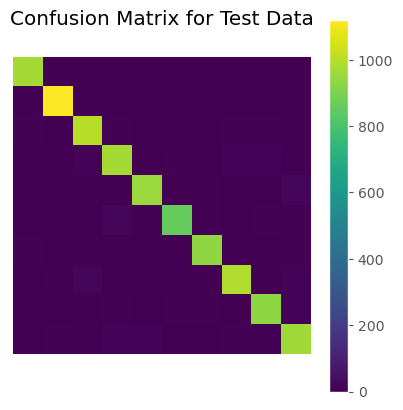

In [17]:
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)
print('\nRFC Trained Classifier Confidence: ', confidence)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix: \n', conf_mat)
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

In [12]:
sys.stdout = old_stdout
log_file.close()

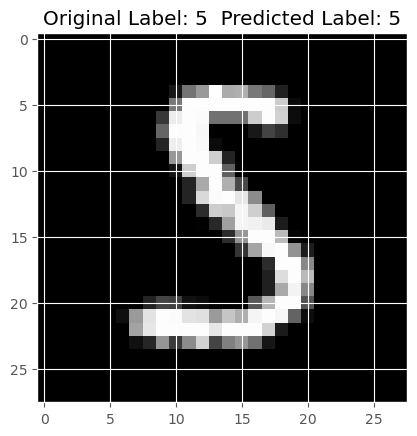

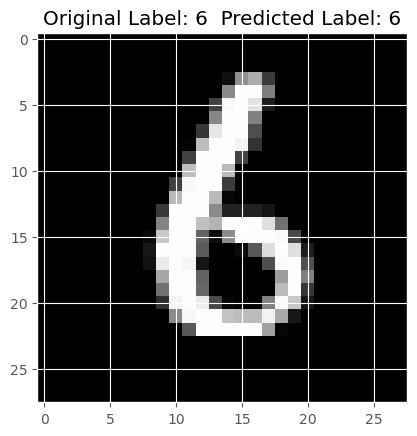

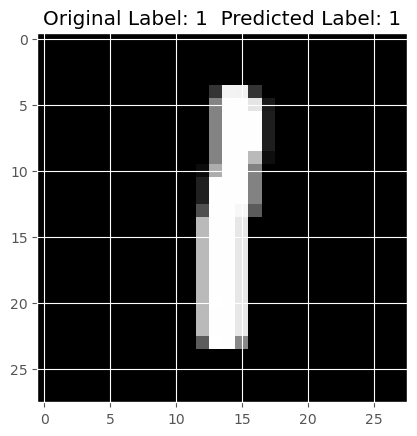

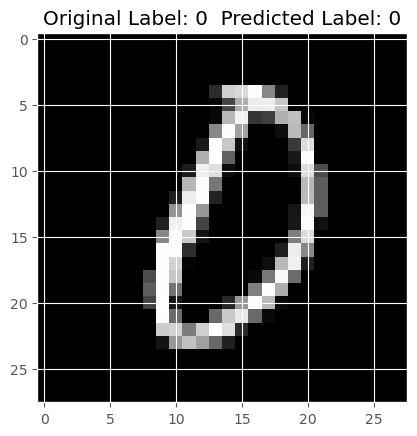

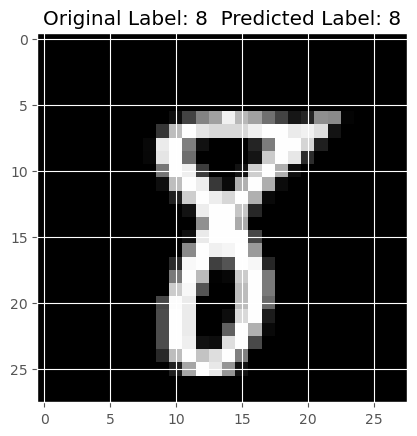

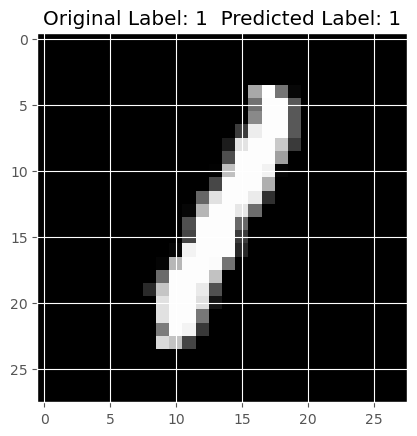

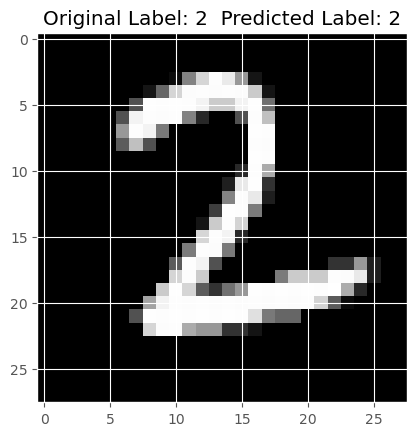

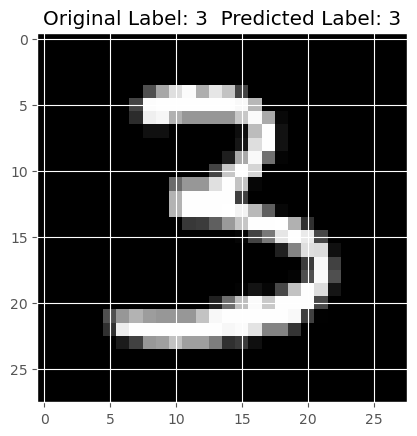

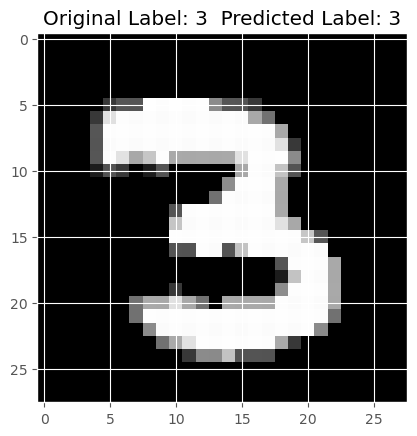

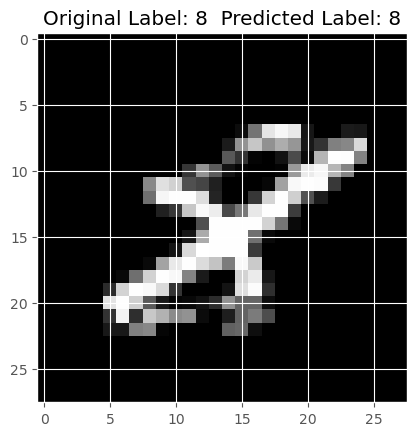

In [13]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(0, test_img.shape[0], 10)
for i in a:
    two_d = np.reshape(test_img[i], (28, 28))
    plt.title(f'Original Label: {test_labels[i]}  Predicted Label: {test_labels_pred[i]}')
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
#------------------------- EOC -----------------------------